<a href="https://colab.research.google.com/github/rouakhadhraoui/Le-jeu-de-r-flexion-solitaire-/blob/main/Data_Mining_know_your_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Know your data

Learn how to effectively explore and deeply understand your data before applying datapreprocessing techniques on it.



---


> Author: Dr. Fadoua Ouamani


---





### **The Dataset**

The datas was collected via a form titled "Tell me more about you" that was shared with the student to collect :

*   Some details about their past grades in some classes related to datamining: Statistics, Mathematics, Programming, and English (as the class materials are all designed and written in english)
*   A personality test to have an overall idea about their personalities
*   Preferences

We will not be using all the data collected, we will only use the following data about:


*   The personlity type: nominal attribute with 4 values, Lion, Otter, Beaver, and Golden retriever
*   Being a collector or not: binary attribute
*   The age: Discrete numerical attribute
*   The gender: nominal with two values, F for female and M for male
*   Zodiac sign: nominal attribute with the values representing the different signs
*   Favorite language : nominal attribute as well and it may continue any language among the existing ones
*   4 past grades in Statistics, Mathematics, English and Object-Oriented Programming: Conitnous ration-scaled numerical attributes
*   Being someone who likes learning new skills or not: Binary attribute

The dataset is titled **TAYOU** as the abbreviation of Tell me About YOU. it was purely a matter of coincidence that this term has a beautiful meaning in Japanese. In fact, Tayou means diverse and varied as my students are <3




### 1.   Import the required libraries

1.   Élément de liste

1.   Élément de liste
2.   Élément de liste


2.   Élément de liste






In [ ]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray

pandas = outil principal pour manipuler et analyser ton dataset.
Quand expand_frame_repr est mis à False, le DataFrame s’affiche sur une seule ligne horizontale (si possible), sans être “cassé” en plusieurs lignes.
numpy = moteur mathématique utilisé par pandas et pour les calculs sur les données.

### 2.   Dataset loading and characteristics

In [ ]:
tayou_df = pd.read_csv('tayou - tayou.csv') #...............

on crée un objet tayou_df
pd.read_csv() est une fonction de pandas utilisée pour lire un fichier CSV (Comma-Separated Values).

In [ ]:
tayou_df.head()

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.0,No,M
1,Otter,No,23,Pisces,French,NaN,NaN,NaN,NaN,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.0,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.0,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.0,Yes,F


Une fois le dataset chargé, pour vérifier son contenu, le code suivant est souvent ajouté
Cela affichera les 5 premières lignes du dataset pour vérifier que le chargement est correct.

In [ ]:
tayou_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Personality  117 non-null    object 
 1   Collector    117 non-null    object 
 2   Age          117 non-null    int64  
 3   ZodiacSign   117 non-null    object 
 4   FavLg        115 non-null    object 
 5   GStat        104 non-null    float64
 6   GMath        106 non-null    float64
 7   GOOP         105 non-null    float64
 8   GEnglish     107 non-null    float64
 9   LearnNSkill  117 non-null    object 
 10  Gender       117 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 10.2+ KB


le nombre de valeurs non nulles par colonne,

In [ ]:
tayou_df.describe()

,Age,GStat,GMath,GOOP,GEnglish
count,117.000000,104.000000,106.000000,105.000000,107.000000
mean,23.179487,13.970000,13.777075,14.679429,14.358972
std,1.236063,2.574937,2.319382,1.872015,2.293478
min,22.000000,8.400000,7.000000,10.000000,8.000000
25%,23.000000,12.000000,12.000000,13.500000,13.000000
50%,23.000000,14.000000,14.000000,15.000000,14.500000
75%,23.000000,16.000000,15.000000,16.000000,15.400000
max,32.000000,19.000000,20.000000,18.000000,20.000000


pour les statistiques de base

In [ ]:
tayou_df.shape

(117, 11)

pour connaître la taille du dataset (nb de lignes et colonnes)

In [ ]:
tayou_df.columns #....................................

Index(['Personality', 'Collector', 'Age', 'ZodiacSign', 'FavLg', 'GStat',
       'GMath', 'GOOP', 'GEnglish', 'LearnNSkill', 'Gender'],
      dtype='object')

Cette instruction affiche la liste des noms de colonnes du DataFrame tayou_df.

Elle ne montre pas les données, juste les étiquettes des colonnes (en-têtes).

Le résultat retourné est un objet de type Index, qui contient tous les noms de colonnes du CSV.

### 3.   Central tendency



in this section we will be answering the following question: **Given an attribute, where do most of its values fall?**

The central tendency measures the location of **the middle **or **center **of a data distribution

Measures are: **mean**, **median** and **mode**


In [ ]:
num_split=tayou_df.loc[:,tayou_df.dtypes!=object] #..........................................
num_split.head()

,Age,GStat,GMath,GOOP,GEnglish
0,24,15.0,15.00,15.0,18.0
1,23,NaN,NaN,NaN,NaN
2,23,10.0,10.00,13.0,13.0
3,22,14.0,12.00,17.0,15.0
4,23,18.0,18.15,16.0,15.0


1- Ici, on veut séparer les colonnes numériques du reste des données.
tayou_df.dtypes renvoie le type de chaque colonne.

tayou_df.dtypes != object crée un filtre booléen :

True pour les colonnes numériques,

False pour les colonnes non numériques.

tayou_df.loc[:, ...] sélectionne :

toutes les lignes (:),

uniquement les colonnes dont le type n’est pas object (donc numériques).
num_split contient uniquement les colonnes numériques du dataset.


2- vérification si on a juste extraire les données numériques : .head() affiche les 5 premières lignes du DataFrame num_split.  

In [ ]:
categ_split=tayou_df.loc[:,tayou_df.dtypes==object] #...........................................
categ_split.head()

,Personality,Collector,ZodiacSign,FavLg,LearnNSkill,Gender
0,Lion,No,Libra,English,No,M
1,Otter,No,Pisces,French,No,M
2,Lion,No,Leo,English,Yes,M
3,Lion,No,Scorpio,English,Yes,F
4,Lion,No,Leo,French,Yes,F


sélectionner cette fois les colonnes dont le type est object, c’est-à-dire celles qui contiennent :

du texte (chaînes de caractères),

ou des valeurs nominales (catégories, étiquettes, réponses “Oui/Non”, etc.).

puis on vérifie

In [ ]:
for column_name in num_split.columns:
    print(num_split[column_name].mean())
    print(num_split[column_name].median())
    print(num_split[column_name].mode())

23.17948717948718
23.0
0    23
Name: Age, dtype: int64
13.97
14.0
0    15.0
Name: GStat, dtype: float64
13.777075471698112
14.0
0    15.0
Name: GMath, dtype: float64
14.67942857142857
15.0
0    15.0
Name: GOOP, dtype: float64
14.358971962616824
14.5
0    15.0
Name: GEnglish, dtype: float64


Ce code parcourt chaque colonne numérique du DataFrame num_split
(puisque on l’as isolé précédemment avec tayou_df.dtypes != object)
et affiche trois mesures statistiques :

la moyenne (mean),

la médiane (median),

et le mode (mode).

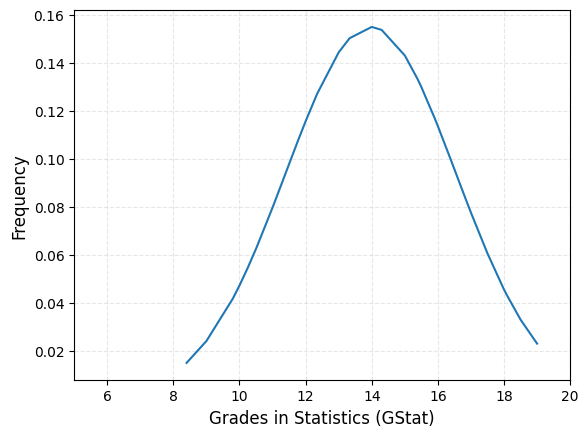

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# Calculating the mean and standard deviation of the parameter "GStat":
mean = tayou_df['GStat'].mean()
std = tayou_df['GStat'].std()

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(tayou_df['GStat'].sort_values(), mean, std)

# Drawing a graph
plt.plot(tayou_df['GStat'].sort_values(), pdf)
plt.xlim([5,20])
plt.xlabel('Grades in Statistics (GStat)', size=12)
plt.ylabel('Frequency', size=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

Ce code a pour objectif de visualiser la distribution des notes en statistiques (GStat) et de voir si elles suivent une loi normale (distribution en cloche).
En d’autres termes :On veut comprendre comment les étudiants sont répartis selon leurs notes en Statistiques.

1-calcule la moyenne et l’écart-type des notes GStat.

La moyenne (mean) indique la tendance centrale, c’est-à-dire la note typique.

L’écart-type (std) mesure la dispersion : si les notes sont très éparpillées ou au contraire concentrées autour de la moyenne.

2-À partir de ces deux valeurs, il calcule la fonction de densité de probabilité (PDF) d’une loi normale ayant la même moyenne et le même écart-type que les données réelles.
➜ C’est ce qui modélise la “courbe en cloche”.

3-Enfin, il trace le graphique :

L’axe x montre les valeurs possibles de notes (entre 5 et 20).

L’axe y représente la densité de probabilité (la fréquence relative).

La courbe en cloche indique où les notes se concentrent : plus la courbe est haute, plus les notes autour de cette valeur sont fréquentes.



selon le graphique obtenue : La distribution des notes en Statistiques est centrée autour de 14, et symétrique, indiquant :

Une bonne performance générale des étudiants.

Peu de valeurs extrêmes (ni très faibles, ni très fortes).

Une tendance normale typique d’une population homogène.


La courbe a une forme de cloche (symétrique), typique d’une distribution normale.
Cela signifie que la majorité des étudiants ont des notes proches de la moyenne, tandis que peu d’étudiants ont des notes très faibles ou très élevées.

In [ ]:
for column_name in categ_split.columns:
    print(categ_split[column_name].mode())
    print(categ_split[column_name].value_counts())

0    Lion
Name: Personality, dtype: object
Personality
Lion                50
Golden retriever    32
Beaver              25
Otter               10
Name: count, dtype: int64
0    No
Name: Collector, dtype: object
Collector
No     85
Yes    32
Name: count, dtype: int64
0    Leo
Name: ZodiacSign, dtype: object
ZodiacSign
Leo            14
Gemini         13
Scorpio        12
Pisces         11
Cancer         11
Libra           9
Virgo           9
Sagittarius     9
Aquarius        9
Taurus          8
Aries           7
Capricorn       5
Name: count, dtype: int64
0    English
Name: FavLg, dtype: object
FavLg
English     41
French      33
Arabic      26
Spanish      8
Italian      4
German       2
Japanese     1
Name: count, dtype: int64
0    Yes
Name: LearnNSkill, dtype: object
LearnNSkill
Yes    111
No       6
Name: count, dtype: int64
0    F
Name: Gender, dtype: object
Gender
F    66
M    51
Name: count, dtype: int64


La fonction mode() renvoie la valeur la plus fréquente dans la colonne.

En d’autres termes, c’est la catégorie dominante (celle qui apparaît le plus souvent).





```
# Ce texte est au format code
```

### 4.  Dispersion



In this section, we will be answering the following question: **How are the data spread out?** by measuring the variability of data

Measures: **range**, **quartiles**,**interquartile range**, **variance** and **standard deviation**

La dispersion permet de savoir à quel point les valeurs d’un attribut sont éloignées les unes des autres.
Autrement dit : est-ce que les données sont regroupées autour de la moyenne ou bien étalées ?

In [ ]:
# the range
def range_imp(dat):
  return (dat.max()-dat.min())

Ce code définit une fonction personnalisée nommée range_imp() qui calcule l’étendue (range) d’une série de données.

dat.max() → renvoie la valeur maximale de la série.

dat.min() → renvoie la valeur minimale de la série.

La soustraction (dat.max() - dat.min()) donne l’étendue.

donc L’étendue (range) = différence entre la plus grande et la plus petite valeur observée.

In [ ]:
#Use the function to compute the range for each numerical attribute
# Calcul du range pour chaque attribut numérique
for column_name in num_split.columns:
    range_value = range_imp(num_split[column_name])
    print(f"{column_name} → Range : {range_value}")

Age → Range : 10
GStat → Range : 10.6
GMath → Range : 13.0
GOOP → Range : 8.0
GEnglish → Range : 12.0


appliquer la fonction range_imp() à chaque attribut numérique du dataset (celui contenu dans num_split).


Parcourt chaque colonne numérique comme Age, GStat, GMath,...

Calcule l’étendue (max - min) avec la fonction range_imp().

Affiche le résultat pour chaque attribut.

In [ ]:
tayou_df.describe()

,Age,GStat,GMath,GOOP,GEnglish
count,117.000000,104.000000,106.000000,105.000000,107.000000
mean,23.179487,13.970000,13.777075,14.679429,14.358972
std,1.236063,2.574937,2.319382,1.872015,2.293478
min,22.000000,8.400000,7.000000,10.000000,8.000000
25%,23.000000,12.000000,12.000000,13.500000,13.000000
50%,23.000000,14.000000,14.000000,15.000000,14.500000
75%,23.000000,16.000000,15.000000,16.000000,15.400000
max,32.000000,19.000000,20.000000,18.000000,20.000000


tayou_df.describe() donne une vue d’ensemble sur :

la tendance centrale (avec la moyenne et la médiane),

la dispersion (écart-type, min/max),

la forme de la distribution (en comparant la moyenne et la médiane).


on peut alors conclure :

Les étudiants ont en moyenne 22 ans, avec une faible dispersion (±1.8 ans).

Les notes sont assez homogènes (écart-type ≈ 2).

Les notes en programmation (GOOP) sont légèrement plus élevées que les autres matières.

In [ ]:
#Quartiles
for column_name in num_split.columns:
    print(num_split[column_name].quantile([0.25,0.5,0.75]))

0.25    23.0
0.50    23.0
0.75    23.0
Name: Age, dtype: float64
0.25    12.0
0.50    14.0
0.75    16.0
Name: GStat, dtype: float64
0.25    12.0
0.50    14.0
0.75    15.0
Name: GMath, dtype: float64
0.25    13.5
0.50    15.0
0.75    16.0
Name: GOOP, dtype: float64
0.25    13.0
0.50    14.5
0.75    15.4
Name: GEnglish, dtype: float64


Ce code parcourt chaque colonne numérique (par exemple Age, GStat, GMath, GOOP, GEnglish) et affiche les trois quartiles de chacune.


Interprétation pour GStat  :

25 % des étudiants ont une note en Statistique ≤ 12

50 % (la moitié) ont ≤ 14

75 % ont ≤ 15

Donc la majorité des étudiants ont leurs notes entre 13 et 16, ce qui montre une dispersion modérée.

In [ ]:
#interquartile range (IQR)
def interquartile_range(dat):
  return (dat.quantile(0.75)-dat.quantile(0.25))

Cette fonction :

Prend en entrée une série numérique (par exemple une colonne de ton DataFrame),

Calcule :

le troisième quartile (Q3) → dat.quantile(0.75)

le premier quartile (Q1) → dat.quantile(0.25)

Retourne leur différence iqr = q3 - q1

In [ ]:
#Use the function to compute the interquartile range for each numerical attribute
for column_name in num_split.columns:
    iqr = interquartile_range(num_split[column_name])
    print(f"{column_name} → IQR : {iqr}")


Age → IQR : 0.0
GStat → IQR : 4.0
GMath → IQR : 3.0
GOOP → IQR : 2.5
GEnglish → IQR : 2.4000000000000004


ce code parcourt toutes les colonnes contenues dans num_split (donc uniquement les variables numériques comme Age, GStat, GMath, GOOP, GEnglish).

Il appelle ta fonction interquartile_range() pour chaque colonne.

Il affiche le résultat sous la forme :

<Axes: >

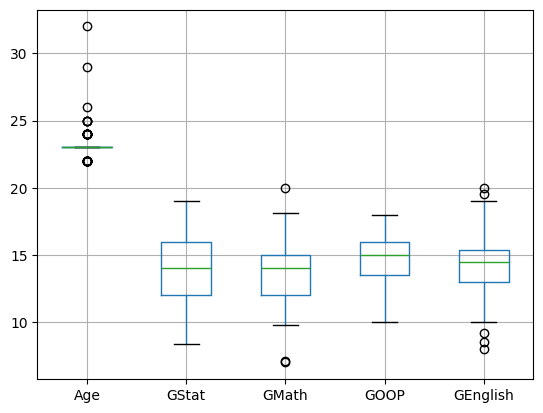

In [ ]:
#boxplots
num_split.boxplot()

Interpret the boxplots accroding to the values obtained in the previous results

Ce code trace un boxplot pour toutes les colonnes numériques de ton DataFrame num_split.

In [ ]:
#Variance
num_split.var()

,0
Age,1.527851
GStat,6.630299
GMath,5.379535
GOOP,3.504440
GEnglish,5.260043


Cette instruction demande à Pandas de calculer la variance pour chaque colonne numérique du DataFrame num_split.

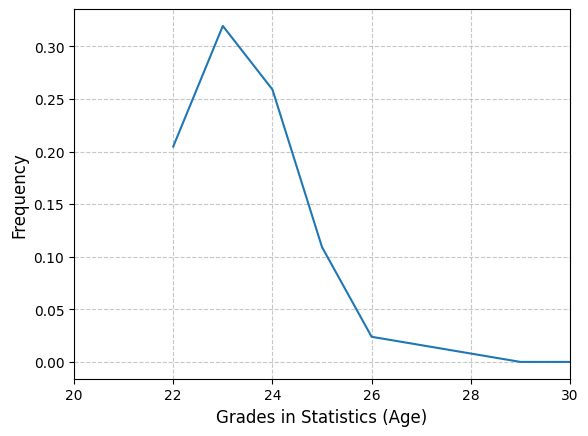

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# Calculating the mean and standard deviation of the parameter "GStat":
mean = tayou_df['Age'].mean()
std = tayou_df['Age'].std()

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(tayou_df['Age'].sort_values(), mean, std)

# Drawing a graph
plt.plot(tayou_df['Age'].sort_values(), pdf)
plt.xlim([20,30])
plt.xlabel('Grades in Statistics (Age)', size=12)
plt.ylabel('Frequency', size=12)
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()

On calcule la moyenne et l’écart-type de la colonne Age pour caractériser la distribution normale à tracer.

stats.norm.pdf() génère les valeurs de la fonction de densité de probabilité (PDF) selon une loi normale
Cela permet de visualiser à quelle fréquence théorique chaque âge apparaît si la variable suit une distribution normale.

tracé : Ce que fait ce graphique :

L’axe x : les valeurs d’âge (entre 20 et 30 ans)

L’axe y : la densité de probabilité (plus elle est haute, plus ces âges sont fréquents)

La courbe en cloche : montre si Age suit une distribution normale (symétrique autour de la moyenne)

plt.grid() : ajoute une grille légère pour mieux lire la courbe.



selon le cas affiché : La courbe montre que la densité est maximale vers 23 ans, puis diminue progressivement jusqu’à presque 0 vers 28–30 ans.
La distribution est asymétrique à droite (skewed right) :
La majorité des individus sont jeunes (entre 22 et 24 ans), et peu d’entre eux ont plus de 25 ans.

Ce n’est pas une courbe normale (non symétrique).

In [ ]:
#Standard deviation
num_split.std()

,0
Age,1.236063
GStat,2.574937
GMath,2.319382
GOOP,1.872015
GEnglish,2.293478


L’attribut Age est le plus homogène (peu de différences d’âge).

Les plus grandes dispersions concernent les notes en Statistiques et Mathématiques, indiquant une diversité de niveaux dans ces matières.

GOOP est la matière la plus uniforme en termes de performance.

Interpret the results:

### 5. Symmetry

In [ ]:
#Skewness
num_split.skew()

,0
Age,4.193184
GStat,-0.105468
GMath,-0.188338
GOOP,-0.314455
GEnglish,-0.065397


La seule variable fortement non symétrique est l’âge, indiquant un groupe majoritairement jeune.

Les notes sont toutes quasiment symétriques, ce qui veut dire que les performances des étudiants sont bien réparties et ne présentent pas de biais fort vers les très bonnes ou très mauvaises notes.

Interpret the results:

In [ ]:
#Kurtosis
num_split.kurtosis()

,0
Age,25.538067
GStat,-0.889223
GMath,0.330941
GOOP,-0.363140
GEnglish,0.294002


Age est une distribution extrêmement concentrée autour d’une valeur typique (sans doute 22–23 ans), avec quelques exceptions beaucoup plus âgées.

Les notes des matières ont des distributions proches de la normale, avec des différences légères :

GStat et GOOP sont un peu plus dispersées.

GMath et GEnglish sont légèrement plus concentrées autour de la moyenne.

In [ ]:

#test de normalité Shapiro-Wilk test

from scipy.stats import shapiro

# Test de normalité pour chaque variable numérique
print("=== Test de normalité (Shapiro-Wilk) ===\n")

for column in num_split.columns:
    stat, p = shapiro(num_split[column])
    print(f"{column}:")
    print(f"  → Statistique de test = {stat:.4f}")
    print(f"  → p-value = {p:.4f}")

    # Interprétation automatique
    if p > 0.05:
        print("   La distribution semble normale (on ne rejette pas H0)\n")
    else:
        print("   La distribution n'est pas normale (on rejette H0)\n")


=== Test de normalité (Shapiro-Wilk) ===

Age:
  → Statistique de test = 0.5745
  → p-value = 0.0000
   La distribution n'est pas normale (on rejette H0)

GStat:
  → Statistique de test = nan
  → p-value = nan
   La distribution n'est pas normale (on rejette H0)

GMath:
  → Statistique de test = nan
  → p-value = nan
   La distribution n'est pas normale (on rejette H0)

GOOP:
  → Statistique de test = nan
  → p-value = nan
   La distribution n'est pas normale (on rejette H0)

GEnglish:
  → Statistique de test = nan
  → p-value = nan
   La distribution n'est pas normale (on rejette H0)

